In [1]:
# 导入相应的包
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  

In [2]:
# 导入数据
data = pd.read_csv('data.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [3]:
(data['V1'].min(),data['V1'].max())

(-22.49599, 104.3766)

In [4]:
(data['V2'].min(),data['V2'].max())

(-38.7955, 87.3137)

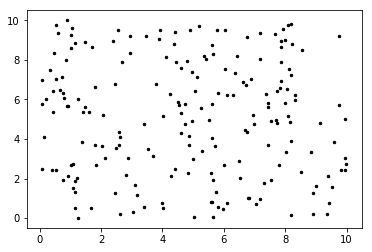

In [5]:
# 提取字段并可视化数据，使用scatter plot
f1 = data['V1'].values
f2 = data['V2'].values
# X = np.array(list(zip(f1, f2)))
# 用于测试不同的初始化中心点对最终结果是否有影响的数据集，原数据集过于简单，体现不出来
X = np.random.random((200, 2))*10
plt.scatter(X[:,0], X[:,1], c='black', s=6)

#plt.scatter(f1, f2, c='black', s=8)

# 不同的初始化的中心点，最终收敛的中心点是不同的

初始化之后的中心点：
[[8. 7.]
 [3. 1.]
 [5. 8.]]


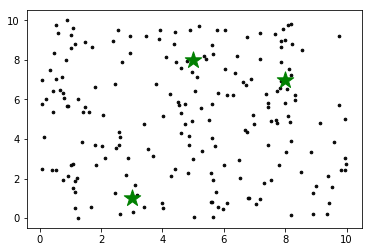

In [8]:
# K-means里的K值
k = 3
# 随机初始化K个中心点，把结果存储在C
C_x = np.random.randint(0, np.max(X), size=k)
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

print("初始化之后的中心点：")
print(C)

# 把中心点也展示一下
plt.scatter(X[:,0], X[:,1], c='#050505', s=7)
plt.scatter(C[:,0], C[:,1], marker='*', s=300, c='g')


最终的中心点：
[[7.8926487 5.701562 ]
 [3.8557444 2.1662176]
 [2.7079694 7.5791545]]


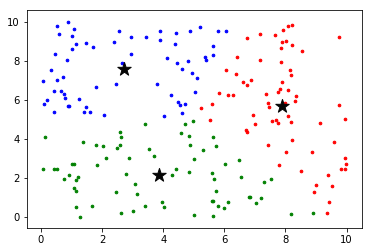

In [9]:
# 存储之前的中心点
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X)) # K=3,  clusters = [0,0,1,2,1,0]

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

error = dist(C, C_old, None)
# 循环算法，直到收敛。收敛的条件就是，判断当前的中心点与之前的中心点之间有没有变化，没有变化距离就会变成0，然后抛出异常
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # 在计算新的中心点之前，先把旧的中心点存下来，以便计算距离
    C_old = deepcopy(C)
    # 计算新的中心点
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

# 最终的中心点
print("最终的中心点：")
print(C)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

最终的中心点：
[[7.2183867 6.447834 ]
 [1.8614279 7.5597754]
 [4.3600755 2.081869 ]]

最终的中心点：
[[7.8926487 5.701562 ]
 [3.8557444 2.1662176]
 [2.7079694 7.5791545]]